In [1]:
# Data management
import pandas as pd

# Math and Stat modules
import numpy as np

# Data preprocessing and trasformation (ETL)
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, FunctionTransformer, Binarizer, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#Imputer
from sklearn.impute import SimpleImputer

#Supervised Learning
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold, StratifiedKFold, RepeatedKFold, ShuffleSplit, StratifiedShuffleSplit, learning_curve, validation_curve, cross_validate
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

# Visualization
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import export_graphviz
import seaborn as sns

In [4]:
dataset = pd.read_csv("data/marketing_campaign.csv", sep=";")

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'Year_Birth'}>,
        <AxesSubplot:title={'center':'Income'}>],
       [<AxesSubplot:title={'center':'Kidhome'}>,
        <AxesSubplot:title={'center':'Teenhome'}>,
        <AxesSubplot:title={'center':'Recency'}>],
       [<AxesSubplot:title={'center':'MntWines'}>,
        <AxesSubplot:title={'center':'MntFruits'}>,
        <AxesSubplot:title={'center':'MntMeatProducts'}>],
       [<AxesSubplot:title={'center':'MntFishProducts'}>,
        <AxesSubplot:title={'center':'MntSweetProducts'}>,
        <AxesSubplot:title={'center':'MntGoldProds'}>],
       [<AxesSubplot:title={'center':'NumDealsPurchases'}>,
        <AxesSubplot:title={'center':'NumWebPurchases'}>,
        <AxesSubplot:title={'center':'NumCatalogPurchases'}>],
       [<AxesSubplot:title={'center':'NumStorePurchases'}>,
        <AxesSubplot:title={'center':'NumWebVisitsMonth'}>,
        <AxesSubplot:title={'center':'AcceptedCmp3'}>],
       [

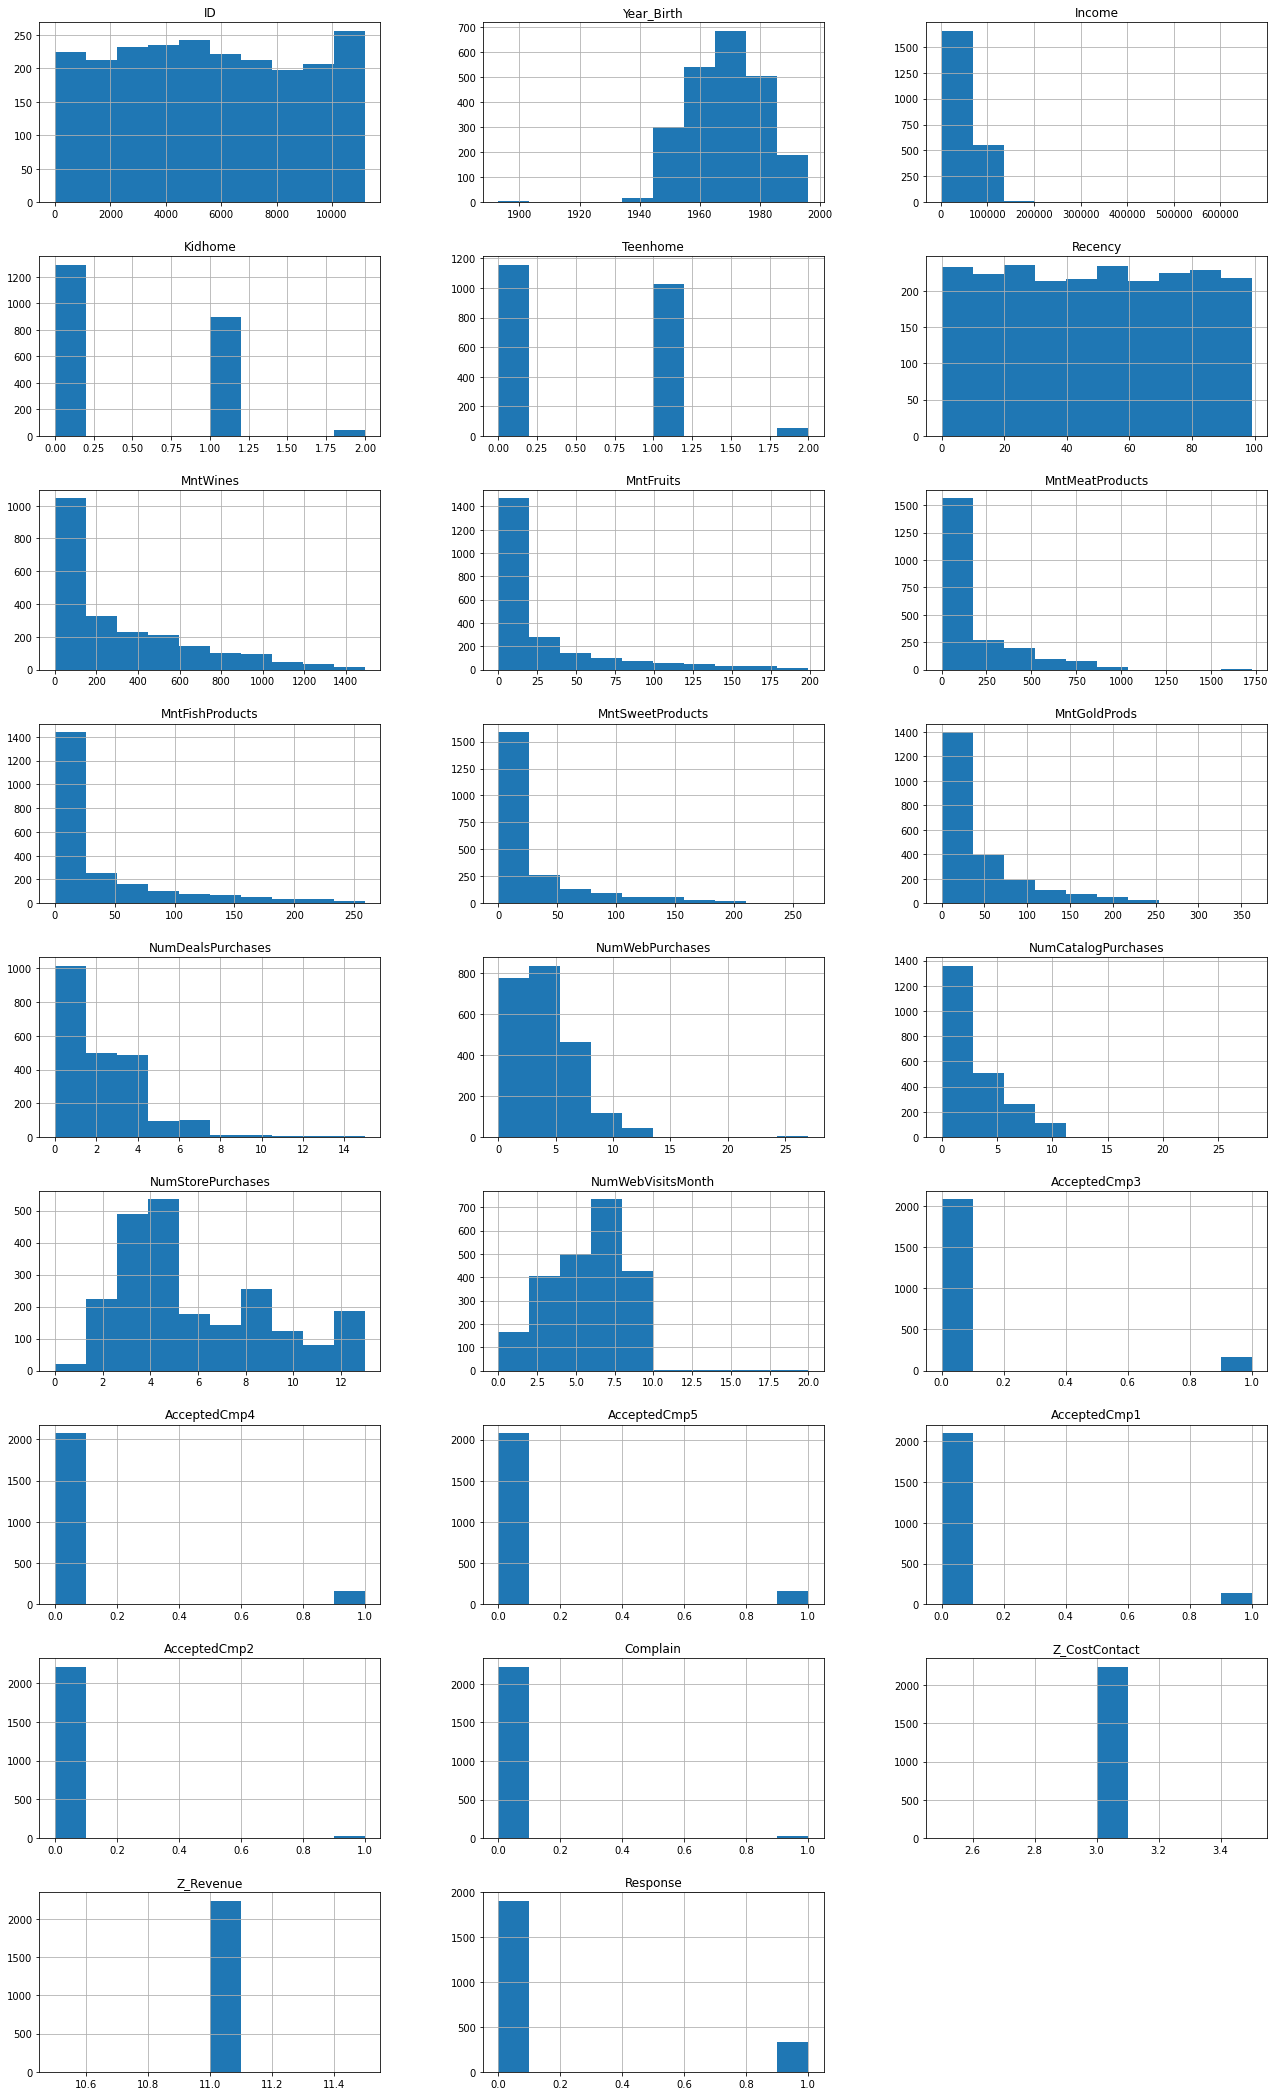

In [3]:
dataset.hist(figsize=(22,42), layout=(10, 3))

In [4]:
dataset.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


La colonna *Income* ha dei valori mancanti. Bisogna correggerli. Controllo se è molto correlato ad altre feature.

In [8]:
dataset[dataset['Income'].isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,...,6,0,0,0,0,0,0,3,11,0


Gestisco colonna *Dt_Customer*

In [37]:
dataset.Dt_Customer = pd.to_datetime(dataset.Dt_Customer)
delta = pd.to_datetime("2015-01-01") - dataset.iloc[200]["Dt_Customer"]
delta.total_seconds()/(60*60*24*30)

6.2

Droppiamo i record con *Income* == NaN e altre 3 colonne che non ci servono:
- ID
- Z_CostContact
- Z_Revenue

In [9]:
dataset.drop(columns=['ID', 'Z_CostContact', 'Z_Revenue', 'Dt_Customer'], inplace=True)
dataset.dropna(subset=['Income'], axis=0, inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2216 non-null   int64  
 1   Education            2216 non-null   object 
 2   Marital_Status       2216 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2216 non-null   int64  
 5   Teenhome             2216 non-null   int64  
 6   Recency              2216 non-null   int64  
 7   MntWines             2216 non-null   int64  
 8   MntFruits            2216 non-null   int64  
 9   MntMeatProducts      2216 non-null   int64  
 10  MntFishProducts      2216 non-null   int64  
 11  MntSweetProducts     2216 non-null   int64  
 12  MntGoldProds         2216 non-null   int64  
 13  NumDealsPurchases    2216 non-null   int64  
 14  NumWebPurchases      2216 non-null   int64  
 15  NumCatalogPurchases  2216 non-null   i

Prendo le Label

In [10]:
dataset_label = dataset['Response'].values
dataset.drop(columns=['Response'], inplace=True)

Converto i dati categorici in numerici:
- Education --> OneHotEncoder
- Marital_Status --> OneHotEncoder
- Dt_Customer --> BOH

In [11]:
#edu_enc = OneHotEncoder()
#edu_ohe = edu_enc.fit_transform(dataset['Education'].values.reshape(-1,1))

In [12]:
#dataset['Education_'+dataset['Education'].unique()] = edu_ohe.toarray()

In [13]:
#mar_enc = OneHotEncoder()
#mar_ohe = mar_enc.fit_transform(dataset['Marital_Status'].values.reshape(-1,1))

In [14]:
#dataset['Marital_Status_'+dataset['Marital_Status'].unique()] = mar_ohe.toarray()

### Devo gestire colonna Dt_Customer magari come categorie (6 mesi, 1 anno, 5+, ...)

In [15]:
#Elimino anche la data di registrazione
#dataset.drop(columns=['Education', 'Marital_Status', 'Dt_Customer'], inplace=True)

## Pipeline

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2216 non-null   int64  
 1   Education            2216 non-null   object 
 2   Marital_Status       2216 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2216 non-null   int64  
 5   Teenhome             2216 non-null   int64  
 6   Recency              2216 non-null   int64  
 7   MntWines             2216 non-null   int64  
 8   MntFruits            2216 non-null   int64  
 9   MntMeatProducts      2216 non-null   int64  
 10  MntFishProducts      2216 non-null   int64  
 11  MntSweetProducts     2216 non-null   int64  
 12  MntGoldProds         2216 non-null   int64  
 13  NumDealsPurchases    2216 non-null   int64  
 14  NumWebPurchases      2216 non-null   int64  
 15  NumCatalogPurchases  2216 non-null   i

array([[<AxesSubplot:title={'center':'Year_Birth'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Kidhome'}>],
       [<AxesSubplot:title={'center':'Teenhome'}>,
        <AxesSubplot:title={'center':'Recency'}>,
        <AxesSubplot:title={'center':'MntWines'}>],
       [<AxesSubplot:title={'center':'MntFruits'}>,
        <AxesSubplot:title={'center':'MntMeatProducts'}>,
        <AxesSubplot:title={'center':'MntFishProducts'}>],
       [<AxesSubplot:title={'center':'MntSweetProducts'}>,
        <AxesSubplot:title={'center':'MntGoldProds'}>,
        <AxesSubplot:title={'center':'NumDealsPurchases'}>],
       [<AxesSubplot:title={'center':'NumWebPurchases'}>,
        <AxesSubplot:title={'center':'NumCatalogPurchases'}>,
        <AxesSubplot:title={'center':'NumStorePurchases'}>],
       [<AxesSubplot:title={'center':'NumWebVisitsMonth'}>,
        <AxesSubplot:title={'center':'AcceptedCmp3'}>,
        <AxesSubplot:title={'center':'AcceptedCmp4'}>]

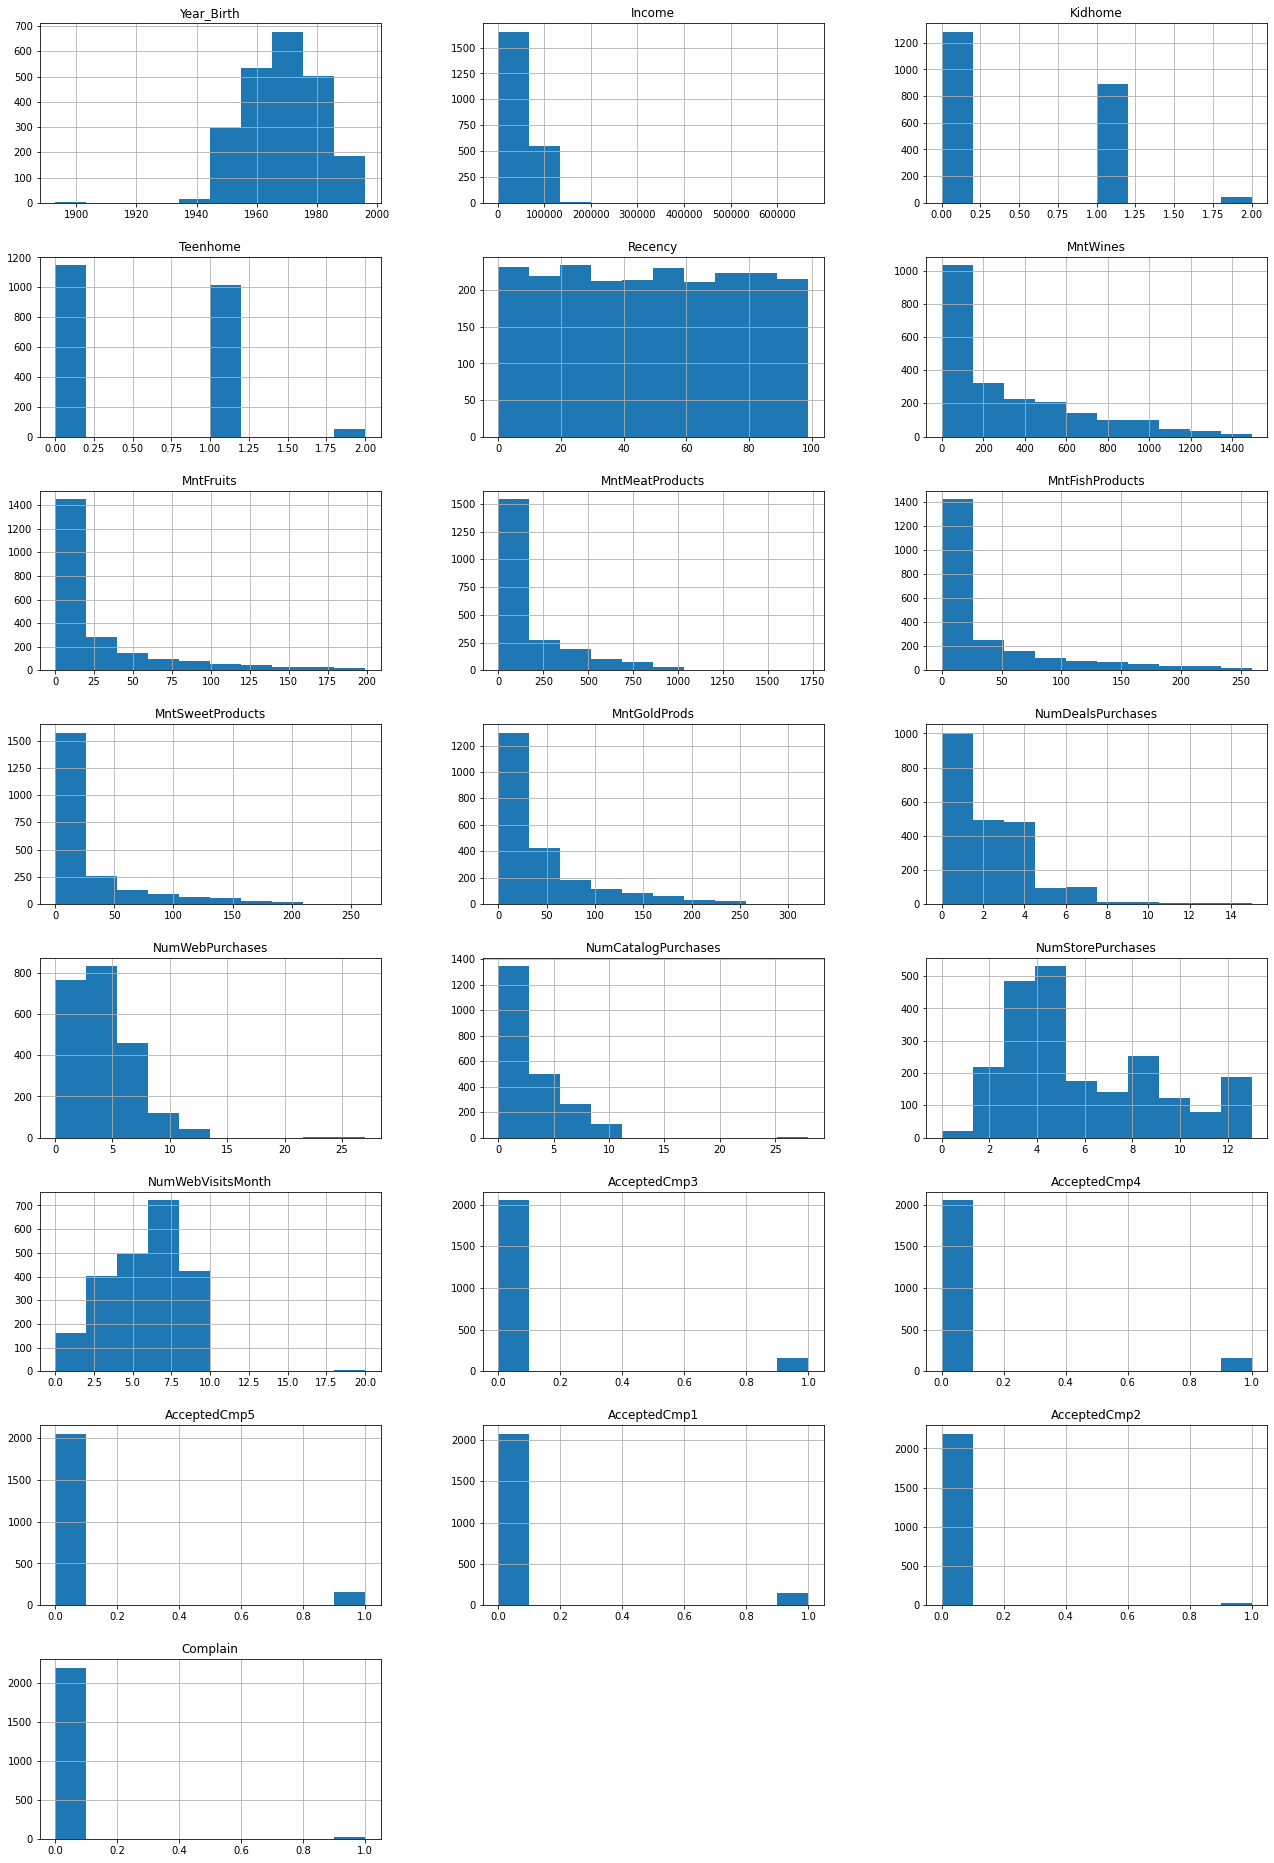

In [17]:
dataset.hist(figsize=(22,42), layout=(10, 3))

In [18]:
robust_features = ['Year_Birth', 'Income', 'NumWebVisitsMonth', 'NumWebPurchases', 'NumCatalogPurchases', 'NumDealsPurchases']
standard_features = ['Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumStorePurchases']

data_preprocessing = ColumnTransformer([
    ('robust', RobustScaler(), robust_features),
    ('cat', OneHotEncoder(), ['Education', 'Marital_Status']),
    ('standard', StandardScaler(), standard_features)
],
    remainder = 'passthrough'
)

In [19]:
feature_matrix = data_preprocessing.fit_transform(dataset)
pd.DataFrame(feature_matrix).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2216 non-null   float64
 1   1       2216 non-null   float64
 2   2       2216 non-null   float64
 3   3       2216 non-null   float64
 4   4       2216 non-null   float64
 5   5       2216 non-null   float64
 6   6       2216 non-null   float64
 7   7       2216 non-null   float64
 8   8       2216 non-null   float64
 9   9       2216 non-null   float64
 10  10      2216 non-null   float64
 11  11      2216 non-null   float64
 12  12      2216 non-null   float64
 13  13      2216 non-null   float64
 14  14      2216 non-null   float64
 15  15      2216 non-null   float64
 16  16      2216 non-null   float64
 17  17      2216 non-null   float64
 18  18      2216 non-null   float64
 19  19      2216 non-null   float64
 20  20      2216 non-null   float64
 21  21      2216 non-null   float64
 22  

Ricreo nomi colonne

In [20]:
columns_name = robust_features
for c in ['Education', 'Marital_Status']:
    cat_inc_name = [c+f"_cat{i}" for i in range(1,len(dataset[c].unique()))]
    columns_name.extend(cat_inc_name)
columns_name.extend(standard_features)
columns_name.extend(dataset.columns.difference(columns_name))
columns_name

['Year_Birth',
 'Income',
 'NumWebVisitsMonth',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumDealsPurchases',
 'Education_cat1',
 'Education_cat2',
 'Education_cat3',
 'Education_cat4',
 'Marital_Status_cat1',
 'Marital_Status_cat2',
 'Marital_Status_cat3',
 'Marital_Status_cat4',
 'Marital_Status_cat5',
 'Marital_Status_cat6',
 'Marital_Status_cat7',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumStorePurchases',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'Complain',
 'Education',
 'Kidhome',
 'Marital_Status',
 'Teenhome']

## Test and Training set

Prendo le label e elimino quella colonna dal dataset.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(feature_matrix, dataset_label, test_size = 0.3, random_state = 42)
X_train.shape, X_test.shape

((1551, 35), (665, 35))

In [22]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train) # apprendo su training
predicted_test = perceptron.predict(X_test) # predico sul test
np.sum(predicted_test == y_test)/len(y_test)

0.8466165413533835

In [23]:
p = Perceptron()
p_score = cross_val_score(p, X_train, y_train, cv = 5).mean()
p_score

0.8342827507519965

In [24]:
# Ci dice per ogni record che prediction ha ricevuto quando faceva parte del validation set
#cross_val_predict(perceptron, X_train, y_train, cv = 5)

In [25]:
kf = KFold(n_splits=10)
kf_score = cross_val_score(p, X_train, y_train, cv = kf).mean()
kf_score

0.8484822167080232

In [26]:
rkf = RepeatedKFold(n_splits=5, n_repeats=4)
rkf_score = cross_val_score(p, X_train, y_train, cv = rkf).mean()
rkf_score

0.849277564567991

In [27]:
spf = ShuffleSplit(n_splits = 10, test_size = 0.25)
spf_score = cross_val_score(p, X_train, y_train, cv = spf, n_jobs=-1).mean()
spf_score

0.8327319587628867

Abbiamo un dataset molto sbilanciato. Provo con StratifiedKFold.

In [28]:
pd.DataFrame(dataset_label).value_counts()

0    1883
1     333
dtype: int64

In [29]:
skf = StratifiedKFold(n_splits=10)
skf_score = cross_val_score(p, X_train, y_train, cv = skf, n_jobs=-1).mean()
skf_score

0.8285070306038047

In [30]:
ssf = StratifiedShuffleSplit(n_splits=10)
ssf_score = cross_val_score(p, X_train, y_train, cv = ssf, n_jobs=-1).mean()
ssf_score

0.8307692307692308

Provo a confrontare con dei DummyClassifier il Perceptron.

In [31]:
mf_dum_cls = DummyClassifier(strategy='most_frequent')
uni_dum_cls = DummyClassifier(strategy='uniform')
st_dum_cls = DummyClassifier(strategy='stratified')

mf_score = cross_val_score(mf_dum_cls, X_train, y_train, cv=10, scoring='accuracy').mean()
uni_score = cross_val_score(uni_dum_cls, X_train, y_train, cv=10, scoring='accuracy').mean()
st_score = cross_val_score(st_dum_cls, X_train, y_train, cv=10, scoring='accuracy').mean()

print("---------- Dummy Classifiers ----------\n")
print("Most frequent score:", mf_score)
print("Uniform score:", uni_score)
print("Stratified score:", st_score)
print("\n---------- Serious Classifiers ----------\n")
print("Perceptron score:", p_score)
print("KFold score:", kf_score)
print("Repeated KFold score:", rkf_score)
print("Shuffle Split score:", spf_score)
print("Stratified KFold score:", skf_score)
print("Stratified Shuffle Split score:", ssf_score)

---------- Dummy Classifiers ----------

Most frequent score: 0.8471960297766751
Uniform score: 0.5054714640198511
Stratified score: 0.750475599669148

---------- Serious Classifiers ----------

Perceptron score: 0.8342827507519965
KFold score: 0.8484822167080232
Repeated KFold score: 0.849277564567991
Shuffle Split score: 0.8327319587628867
Stratified KFold score: 0.8285070306038047
Stratified Shuffle Split score: 0.8307692307692308


Analizziamo le performance con matrice di confusione, precison, recall e f1.

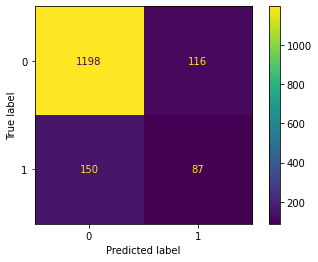

In [32]:
y_train_predicted = cross_val_predict(p, X_train, y_train, cv = 10)
cm = confusion_matrix(y_train, y_train_predicted)
cm_display = ConfusionMatrixDisplay(cm).plot()

Vediamo le performance del perceptron confrontate ai dummy classifier.

In [33]:
y_train_mf = cross_val_predict(mf_dum_cls, X_train, y_train, cv = 10)
y_train_un = cross_val_predict(uni_dum_cls, X_train, y_train, cv = 10)
y_train_st = cross_val_predict(st_dum_cls, X_train, y_train, cv = 10)

print("------------ Perceptron ------------", "\nPrecision:", precision_score(y_train, y_train_predicted), "\nRecall:", recall_score(y_train, y_train_predicted), "\nf1:", f1_score(y_train, y_train_predicted))
print("\n------------ Most frequent ------------", "\nPrecision:", precision_score(y_train, y_train_mf), "\nRecall:", recall_score(y_train, y_train_mf), "\nf1:", f1_score(y_train, y_train_mf))
print("\n------------ Uniform ------------", "\nPrecision:", precision_score(y_train, y_train_un), "\nRecall:", recall_score(y_train, y_train_un), "\nf1:", f1_score(y_train, y_train_un))
print("\n------------ Stratified ------------", "\nPrecision:", precision_score(y_train, y_train_st), "\nRecall:", recall_score(y_train, y_train_st), "\nf1:", f1_score(y_train, y_train_st))

------------ Perceptron ------------ 
Precision: 0.42857142857142855 
Recall: 0.3670886075949367 
f1: 0.39545454545454545

------------ Most frequent ------------ 
Precision: 0.0 
Recall: 0.0 
f1: 0.0

------------ Uniform ------------ 
Precision: 0.14846625766871166 
Recall: 0.510548523206751 
f1: 0.2300380228136882

------------ Stratified ------------ 
Precision: 0.1440677966101695 
Recall: 0.14345991561181434 
f1: 0.1437632135306554


c:\users\marco\appdata\local\programs\python\python39-32\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
# Metti max_iter=100 e guarda link su preprocessing
logit_cls = LogisticRegression(max_iter=100)
y_scores = cross_val_predict(logit_cls, X_train, y_train, cv = 5, method='decision_function')

In [35]:
prec, recall, soglia = precision_recall_curve(y_train, y_scores)

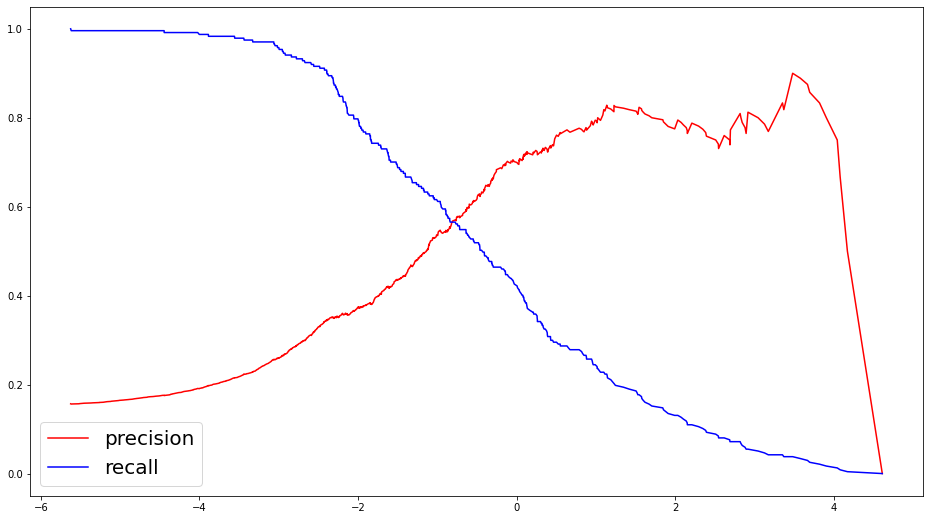

In [36]:
fig_prc = plt.figure(figsize=(16,9))
ax = fig_prc.add_subplot()
ax.plot(soglia, prec[:-1], 'r', label = 'precision')
ax.plot(soglia, recall[:-1], 'b', label = 'recall')
ax.legend(fontsize=20)

Text(0, 0.5, 'Precision')

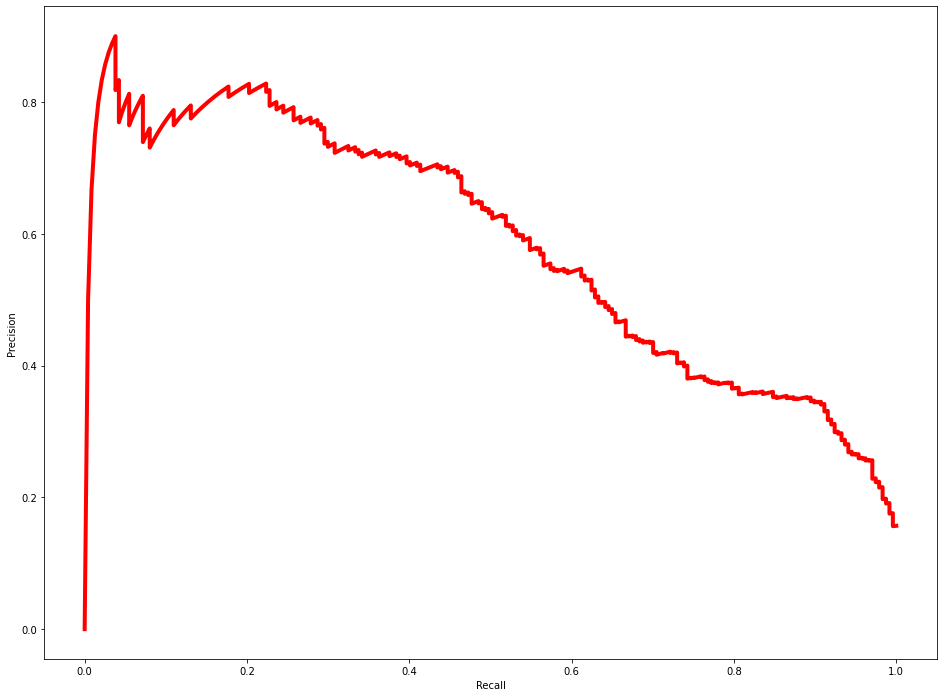

In [37]:
fig_prf = plt.figure(figsize=(16,12))
ax = fig_prf.add_subplot()
ax.plot(recall[:-1], prec[:-1], 'r', label = 'precision', lw = 4)
ax.set_xlabel("Recall")
ax.set_ylabel("Precision")

In [38]:
soglia_prec_90 = soglia[np.argmax(prec >= 0.90)]
y_predicted_score = y_scores >= soglia_prec_90
precision_score(y_train, y_predicted_score), recall_score(y_train, y_predicted_score), f1_score(y_train, y_predicted_score)

(0.9, 0.0379746835443038, 0.07287449392712551)

Text(0, 0.5, 'Recall')

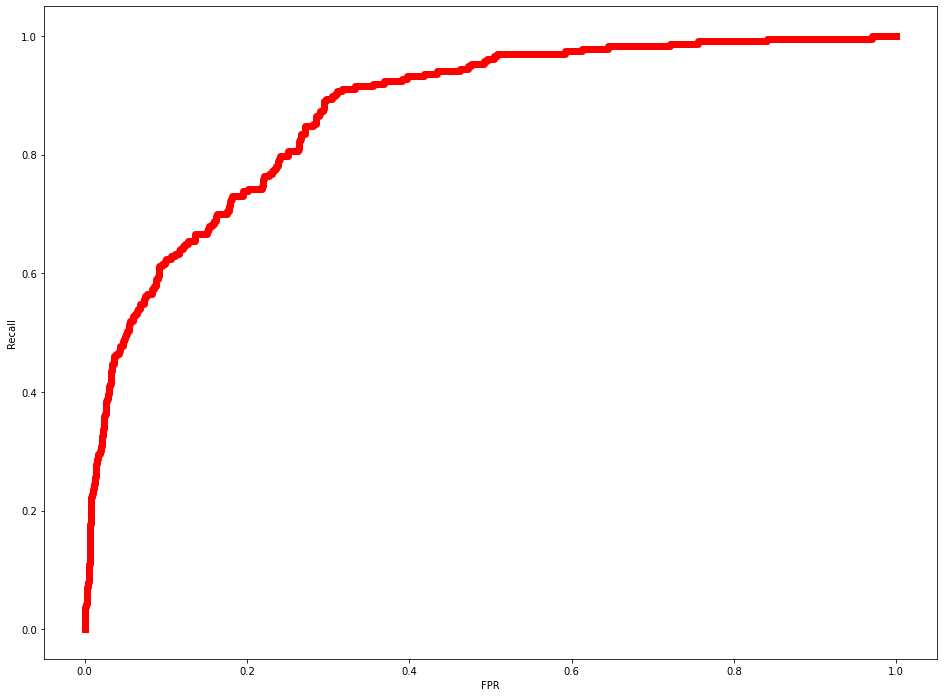

In [39]:
fpr, recall, soglia = roc_curve(y_train, y_scores)

fig_roc = plt.figure(figsize=(16,12))
ax = fig_roc.add_subplot()
ax.plot(fpr, recall, 'r', label = 'recall', lw = 7)
ax.set_xlabel("FPR")
ax.set_ylabel("Recall")

Learning curve

In [40]:
train_sizes, train_scores, test_scores = learning_curve(logit_cls,
                                                       X=feature_matrix,
                                                       y=dataset_label,
                                                       train_sizes= [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                                                       cv = 10,
                                                       n_jobs = -1,
                                                       shuffle = True)

(0.6, 1.03)

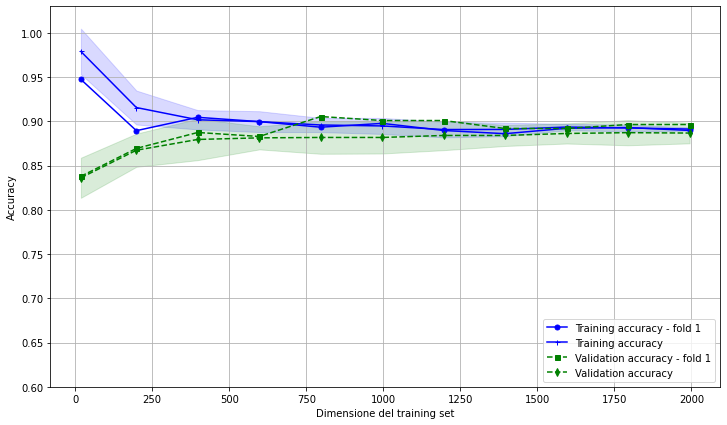

In [41]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig=plt.figure(figsize=(12,7))
ax = fig.add_subplot()
ax.plot(train_sizes, train_scores[:,0],
         color='blue', marker='o',
         markersize=5, label='Training accuracy - fold 1')

ax.plot(train_sizes, train_mean,
         color='blue', marker='+',
         markersize=5, label='Training accuracy')

ax.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

ax.plot(train_sizes, test_scores[:,0],
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy - fold 1')

ax.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='d', markersize=5,
         label='Validation accuracy')

ax.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

ax.grid()
ax.set_xlabel('Dimensione del training set')
ax.set_ylabel('Accuracy')
ax.legend(loc='lower right')
ax.set_ylim([0.6, 1.03])

In [42]:
range_C = [0.001,0.01,0.1,1,10,100]
train_scores, test_scores = validation_curve(logit_cls, X=feature_matrix, y=dataset_label, param_range=range_C, param_name='C',cv=10, n_jobs=-1)

(0.0, 1.03)

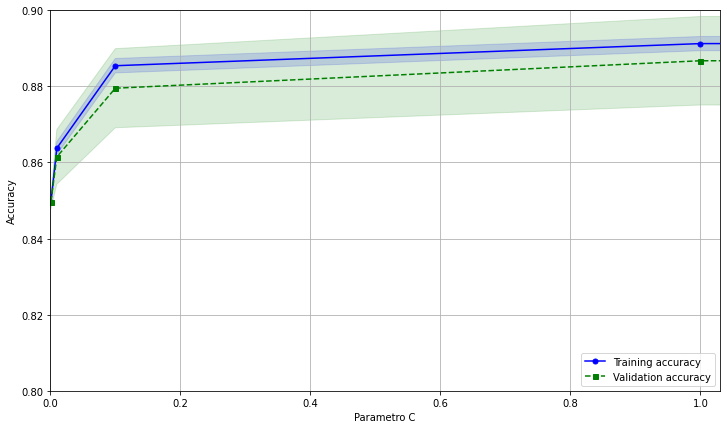

In [43]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig=plt.figure(figsize=(12,7))
ax = fig.add_subplot()
ax.plot(range_C, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

ax.fill_between(range_C,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

ax.plot(range_C, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

ax.fill_between(range_C,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

ax.grid()
ax.set_xlabel('Parametro C')
ax.set_ylabel('Accuracy')
ax.legend(loc='lower right')
ax.set_ylim([0.8, 0.9])
ax.set_xlim([0., 1.03])

## Support Vector Machine

Training SVM per C = 0.01 0
Training per 0.01 finito
Training SVM per C = 0.1 1
Training per 0.1 finito
Training SVM per C = 1 2
Training per 1 finito
Training SVM per C = 10 3
Training per 10 finito
Training SVM per C = 100 4
Training per 100 finito


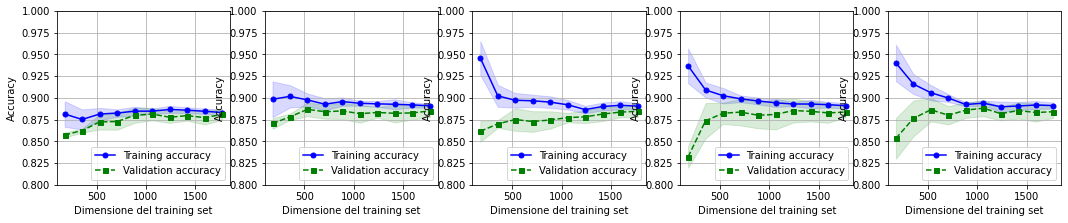

In [44]:
Cs = [0.01, 0.1, 1, 10, 100]# definire un insieme di valori di C tenendo in considerazione le precedenti osservazioni sul suo effetto 
fig = plt.figure(figsize=(18,3.2))
for i, c in enumerate(Cs):
    print('Training SVM per C =', c, i)
    svm_cls = LinearSVC(C = c, max_iter=50000)
    train_sizes, train_scores, test_scores = learning_curve(svm_cls, X = feature_matrix, y = dataset_label, train_sizes=np.linspace(0.1,1,10), cv = 5, n_jobs=-1, shuffle = True)
    

    print('Training per {} finito'.format(c))
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    ax = fig.add_subplot(150+(i+1))
    ax.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')
    ax.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')
    ax.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')
    ax.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
    ax.grid()
    ax.set_ylim((0.8,1))
    ax.set_xlabel('Dimensione del training set')
    ax.set_ylabel('Accuracy')
    ax.legend(loc='lower right')

In [45]:
gamma1, gamma2 = 0.1, 2
C1, C2 = 0.01, 5
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

train_sizes, train_means, test_means, test_stds, train_stds = [],[],[],[],[]
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = SVC(kernel="rbf", gamma = gamma, C = C)
    train_size, train_scores, test_scores = learning_curve(rbf_kernel_svm_clf,
                                                       X=feature_matrix,
                                                       y=dataset_label,
                                                       train_sizes=np.linspace(0.1,1.0,10),
                                                       cv=5,
                                                       n_jobs=-1)
    print('fatto {},{}'.format(gamma,C))
    train_means.append(np.mean(train_scores, axis=1))
    train_stds.append(np.std(train_scores, axis=1))
    test_means.append(np.mean(test_scores, axis=1))
    test_stds.append(np.std(test_scores, axis=1))
    train_sizes.append(train_size)

fatto 0.1,0.01
fatto 0.1,5
fatto 2,0.01
fatto 2,5


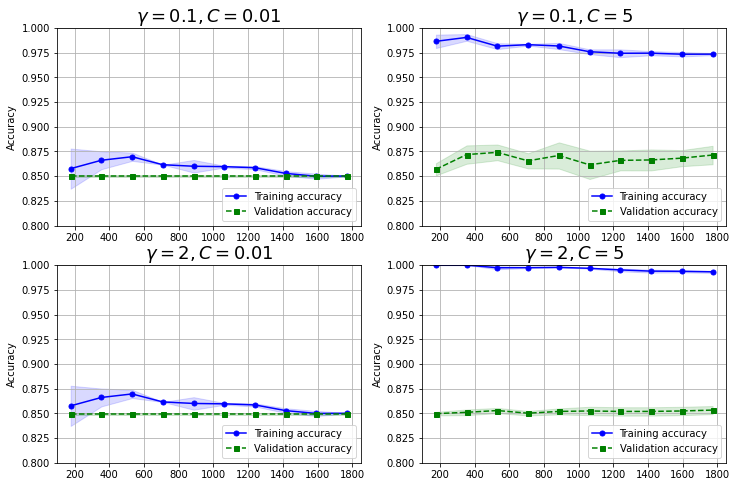

In [46]:
fig= plt.figure(figsize=(12, 8))
for i in range(4):
    ax = fig.add_subplot(221+i)
    ax.plot(train_sizes[i], train_means[i],
         color='blue', marker='o',
         markersize=5, label='Training accuracy')
    ax.fill_between(train_sizes[i],
                 train_means[i] + train_stds[i],
                 train_means[i] - train_stds[i],
                 alpha=0.15, color='blue')
    ax.plot(train_sizes[i], test_means[i],
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')
    ax.fill_between(train_sizes[i],
                 test_means[i] + test_stds[i],
                 test_means[i] - test_stds[i],
                 alpha=0.15, color='green')
    ax.grid()
    ax.set_ylim((0.8,1))
    ax.set_ylabel('Accuracy')
    ax.legend(loc='lower right')
    ax.set_title(r"$\gamma={}, C={}$".format(*hyperparams[i]), fontsize=18)

## Alberi di decisione

In [47]:
min_leaf = [5, 10, 100, 200, 350]

train_sizes, train_means, test_means, test_stds, train_stds = [],[],[],[],[]
for mlf in min_leaf:
    dt_mlf = DecisionTreeClassifier(min_samples_leaf=mlf, random_state=42, max_depth=15)
    train_size, train_scores, test_scores = learning_curve(dt_mlf,
                                                       X=feature_matrix,
                                                       y=dataset_label,
                                                       train_sizes=np.linspace(0.1,1.0,10),
                                                       cv=10,
                                                       n_jobs=-1)
    print('fatto {}'.format(mlf))
    train_means.append(np.mean(train_scores, axis=1))
    train_stds.append(np.std(train_scores, axis=1))
    test_means.append(np.mean(test_scores, axis=1))
    test_stds.append(np.std(test_scores, axis=1))
    train_sizes.append(train_size)

fatto 5
fatto 10
fatto 100
fatto 200
fatto 350


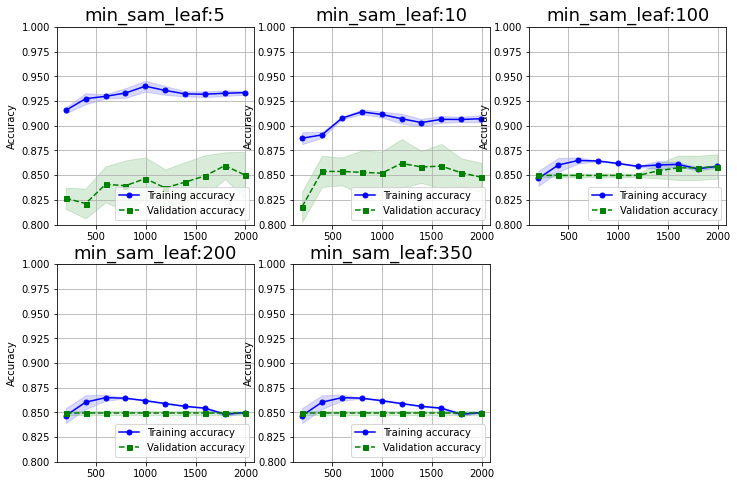

In [48]:
fig= plt.figure(figsize=(12, 8))
for i in range(5):
    ax = fig.add_subplot(231+i)
    ax.plot(train_sizes[i], train_means[i],
         color='blue', marker='o',
         markersize=5, label='Training accuracy')
    ax.fill_between(train_sizes[i],
                 train_means[i] + train_stds[i],
                 train_means[i] - train_stds[i],
                 alpha=0.15, color='blue')
    ax.plot(train_sizes[i], test_means[i],
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')
    ax.fill_between(train_sizes[i],
                 test_means[i] + test_stds[i],
                 test_means[i] - test_stds[i],
                 alpha=0.15, color='green')
    ax.grid()
    ax.set_ylim((0.8,1))
    ax.set_ylabel('Accuracy')
    ax.legend(loc='lower right')
    ax.set_title(r"min_sam_leaf:{}".format(min_leaf[i]), fontsize=18)

## Ensemble methods

In [49]:
def visualize_ensemble_performance(ax, X, y, scores, scoring):
    data_score = []
    labels = []
    for clf in scores['estimator'][0].estimators_:
        scores_clf = cross_validate(clf, X, y,
                        cv = StratifiedShuffleSplit(n_splits=20, test_size=0.2, random_state=42),
                        return_train_score= True,
                        scoring = scoring,
                        n_jobs=-1)
        data_score.extend([scores_clf[t+s] for s in scoring for t in ['train_','test_']])
        labels.extend([clf.__class__.__name__+'_'+t+s for s in scoring for t in ['train_','test_']])
    data_score.extend([scores[t+s] for s in scoring for t in ['train_','test_']])
    labels.extend(['Voting_'+t+s for s in scoring for t in ['train_','test_']])
    sns.boxplot(ax = ax,
                data = data_score,
                whis = [5, 95],
                palette = "vlag",
                orient = 'h'
               )
    ax.set(yticklabels=labels)

In [50]:
log_clf = LogisticRegression(random_state=42)
svm_clf = SVC(random_state=42)
per_clf = Perceptron(random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('pc', per_clf), ('svc', svm_clf)],
    voting='hard')

In [51]:
scores = cross_validate(voting_clf, feature_matrix, dataset_label,
                        cv = StratifiedShuffleSplit(n_splits=20, test_size=0.2, random_state=42),
                        return_estimator = True,
                        return_train_score= True,
                        scoring = ['recall','accuracy','f1'],
                        n_jobs=-1)

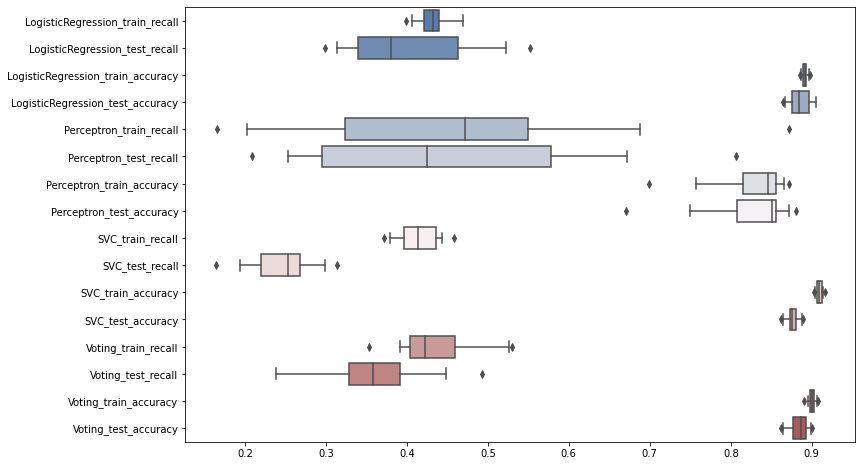

In [52]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot()
visualize_ensemble_performance(ax, feature_matrix, dataset_label, scores, ['recall','accuracy'])

In [53]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=500, max_samples=200, bootstrap=True, n_jobs=-1)
dt_clf = DecisionTreeClassifier(min_samples_leaf=100, random_state=42, max_depth=15)

In [54]:
train_sizes, train_means, test_means, test_stds, train_stds = [],[],[],[],[]
for clf in [bag_clf, dt_clf]:
    train_size, train_scores, test_scores = learning_curve(clf,
                                                       X=feature_matrix,
                                                       y=dataset_label,
                                                       train_sizes=np.linspace(0.1,1.0,10),
                                                       cv=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42),
                                                       n_jobs=-1)
    print('fatto {}'.format(clf))
    train_means.append(np.mean(train_scores, axis=1))
    train_stds.append(np.std(train_scores, axis=1))
    test_means.append(np.mean(test_scores, axis=1))
    test_stds.append(np.std(test_scores, axis=1))
    train_sizes.append(train_size)

fatto BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                  max_samples=200, n_estimators=500, n_jobs=-1)
fatto DecisionTreeClassifier(max_depth=15, min_samples_leaf=100, random_state=42)


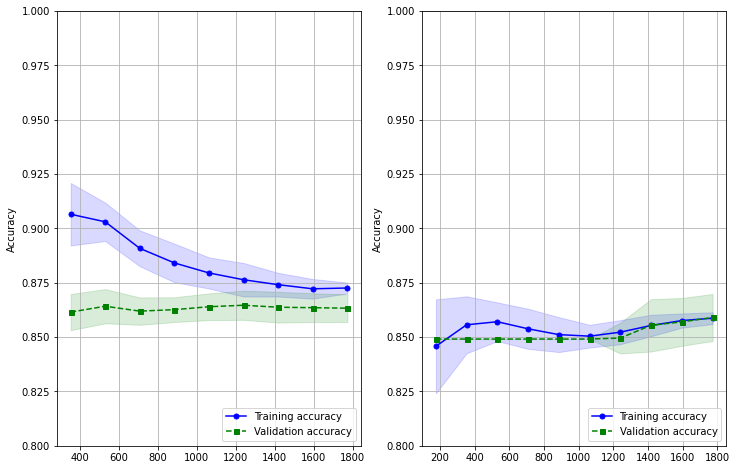

In [55]:
fig= plt.figure(figsize=(12, 8))
for i in range(2):
    ax = fig.add_subplot(121+i)
    ax.plot(train_sizes[i], train_means[i],
         color='blue', marker='o',
         markersize=5, label='Training accuracy')
    ax.fill_between(train_sizes[i],
                 train_means[i] + train_stds[i],
                 train_means[i] - train_stds[i],
                 alpha=0.15, color='blue')
    ax.plot(train_sizes[i], test_means[i],
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')
    ax.fill_between(train_sizes[i],
                 test_means[i] + test_stds[i],
                 test_means[i] - test_stds[i],
                 alpha=0.15, color='green')
    ax.grid()
    ax.set_ylim((0.8,1))
    ax.set_ylabel('Accuracy')
    ax.legend(loc='lower right')

## Random Forest

In [68]:
X_train, X_test, y_train, y_test = train_test_split(feature_matrix, dataset_label, test_size=0.2, stratify=dataset_label)
len(y_train[y_train == 1])/len(y_train), len(y_test[y_test == 1])/len(y_test)

(0.15011286681715574, 0.15090090090090091)

In [83]:
rnf_clf = RandomForestClassifier(n_estimators=250, max_leaf_nodes=64, n_jobs=-1, max_features=10)
et_clf = ExtraTreesClassifier(n_estimators=250, max_leaf_nodes=64, n_jobs=-1, max_features=10)
scores_rnf = cross_val_score(rnf_clf, X_train, y_train, cv=5, scoring='f1', n_jobs=-1)
scores_et = cross_val_score(et_clf, X_train, y_train, cv=5, scoring='f1',n_jobs=-1)

[[Text(0, 0, 'RF'), Text(0, 1, 'ET')], Text(0.5, 0, 'f1')]

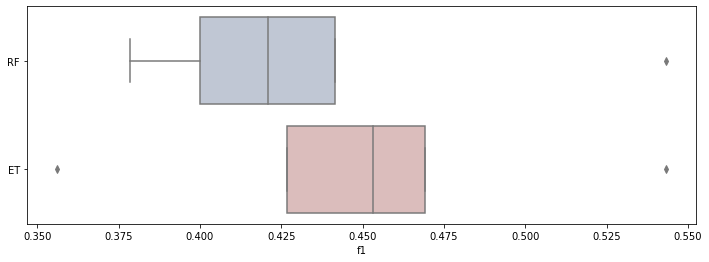

In [84]:
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot()
sns.boxplot(ax = ax,
            data = [scores_rnf, scores_et],
            palette = 'vlag',
            orient = 'h'
           )
ax.set(yticklabels=['RF','ET'], xlabel="f1")

In [105]:
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=6),
    n_estimators=250,
    algorithm='SAMME.R',
    learning_rate=0.5
)
scores_ada = cross_val_score(ada_clf, X_train, y_train, cv=5, scoring='f1', n_jobs=-1)

[[Text(0, 0, 'RF'), Text(0, 1, 'ET'), Text(0, 2, 'ADA')]]

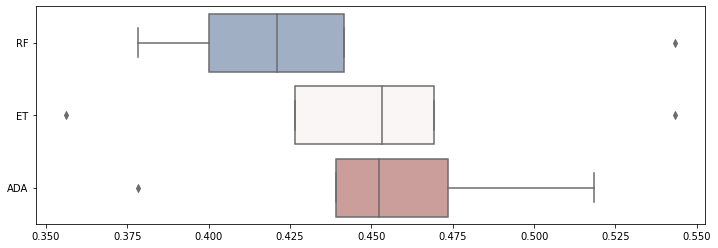

In [106]:
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot()
sns.boxplot(ax = ax,
            data = [scores_rnf, scores_et, scores_ada],
            palette = 'vlag',
            orient = 'h'
           )
ax.set(yticklabels=['RF','ET','ADA'])